In [1]:
import sys
import sys
sys.path
sys.path.append('../')
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import numpy as np
from diamonds import experiments, normal_equation, customSGD


/root/.local/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Discution 1
  - In this document we apply the configuration selected to a set of executions in a way to see the loss curve behaviour. 
  - The scenarios tested concern the batch types: 1 instance, Mini, Stochastic and Full.

In [2]:
X = experiments.load_train_data()
_, (X_train, X_test, y_train, y_test) = experiments.gen_splits(X, scale=True)

## Custom Predictor with the same SKLearn  SGDRegressor Parameters

In [3]:
base_params = {'lr':0.1,
'max_iter':1000,
'batch_sz':50,
'lr_optimizer':'invscaling',
'print_interval':100}

In [4]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Mini',
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 24.99827951 lr: 0.10000000 
It: 100 Batch: 100 Epoch 0 Error: 0.18157222 lr: 0.03162278 
It: 200 Batch: 200 Epoch 0 Error: 0.05369120 lr: 0.02659148 
It: 300 Batch: 300 Epoch 0 Error: 0.03230543 lr: 0.02402811 
It: 400 Batch: 62 Epoch 1 Error: 0.04889141 lr: 0.02236068 
It: 500 Batch: 162 Epoch 1 Error: 0.04773781 lr: 0.02114743 
It: 600 Batch: 262 Epoch 1 Error: 0.03342773 lr: 0.02020516 
It: 700 Batch: 24 Epoch 2 Error: 0.03668546 lr: 0.01944131 
It: 800 Batch: 124 Epoch 2 Error: 0.02346926 lr: 0.01880302 
It: 900 Batch: 224 Epoch 2 Error: 0.02741475 lr: 0.01825742 
It: 1000 Batch: 324 Epoch 2 Error: 0.02490289 lr: 0.01778279 
Finished 
 It: 1000 Batch: 324 Epoch 2 Train Loss: 0.02490289 lr: 0.01778279 


In [5]:
mini_batch = customSGD.get_iteration_log()
mini_batch.head()

5


,it,b_it,epoch,error_train,eta
0,1,1,0,24.998280,0.100000
1,2,2,0,18.706582,0.084090
2,3,3,0,15.503219,0.075984
3,4,4,0,13.202197,0.070711
4,5,5,0,12.079337,0.066874


In [6]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Stochastic',
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
Shuffled
It: 1 Batch: 1 Epoch 0 Error: 22.00407445 lr: 0.10000000 
It: 100 Batch: 100 Epoch 0 Error: 0.11083690 lr: 0.03162278 
It: 200 Batch: 200 Epoch 0 Error: 0.08277578 lr: 0.02659148 
It: 300 Batch: 300 Epoch 0 Error: 0.02876982 lr: 0.02402811 
It: 400 Batch: 62 Epoch 1 Error: 0.04400206 lr: 0.02236068 
It: 500 Batch: 162 Epoch 1 Error: 0.04691133 lr: 0.02114743 
It: 600 Batch: 262 Epoch 1 Error: 0.03295919 lr: 0.02020516 
It: 700 Batch: 24 Epoch 2 Error: 0.01834261 lr: 0.01944131 
It: 800 Batch: 124 Epoch 2 Error: 0.02998539 lr: 0.01880302 
It: 900 Batch: 224 Epoch 2 Error: 0.02103312 lr: 0.01825742 
It: 1000 Batch: 324 Epoch 2 Error: 0.02973317 lr: 0.01778279 
Finished 
 It: 1000 Batch: 324 Epoch 2 Train Loss: 0.02973317 lr: 0.01778279 


In [7]:
stoch_batch = customSGD.get_iteration_log()
stoch_batch.head()

5


,it,b_it,epoch,error_train,eta
0,1,1,0,22.004074,0.100000
1,2,2,0,18.526730,0.084090
2,3,3,0,17.587047,0.075984
3,4,4,0,14.620006,0.070711
4,5,5,0,9.787238,0.066874


In [8]:
base_params = {'lr':0.1,
'max_iter':1000,
'batch_sz':1,
'lr_optimizer':'invscaling',
'print_interval':100}

In [9]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Single',
                      epsilon=.000000000001,
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 12.48941038 lr: 0.10000000 
It: 100 Batch: 100 Epoch 0 Error: 0.25557524 lr: 0.03162278 
It: 200 Batch: 200 Epoch 0 Error: 0.00527541 lr: 0.02659148 
It: 300 Batch: 300 Epoch 0 Error: 0.00673183 lr: 0.02402811 
It: 400 Batch: 400 Epoch 0 Error: 0.00018524 lr: 0.02236068 
It: 500 Batch: 500 Epoch 0 Error: 0.00001751 lr: 0.02114743 
It: 600 Batch: 600 Epoch 0 Error: 0.03353260 lr: 0.02020516 
It: 700 Batch: 700 Epoch 0 Error: 0.00195765 lr: 0.01944131 
It: 800 Batch: 800 Epoch 0 Error: 0.00004396 lr: 0.01880302 
It: 900 Batch: 900 Epoch 0 Error: 0.00064274 lr: 0.01825742 
It: 1000 Batch: 1000 Epoch 0 Error: 0.03693424 lr: 0.01778279 
Finished 
 It: 1000 Batch: 1000 Epoch 0 Train Loss: 0.03693424 lr: 0.01778279 


In [10]:
single_inst = customSGD.get_iteration_log()
single_inst.head()

5


,it,b_it,epoch,error_train,eta
0,1,1,0,12.489410,0.100000
1,2,2,0,14.764419,0.084090
2,3,3,0,3.188158,0.075984
3,4,4,0,5.286223,0.070711
4,5,5,0,0.164882,0.066874


In [11]:
theta = customSGD.SGD(**base_params, 
                      batch_type='Full',
                      X=X_train, y=np.log(y_train), 
                      )
y_pred = np.exp(customSGD.predict(theta, X_test))

Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Error: 24.17583616 lr: 0.10000000 
It: 100 Batch: 1 Epoch 99 Error: 0.14935115 lr: 0.03162278 
It: 200 Batch: 1 Epoch 199 Error: 0.05263419 lr: 0.02659148 
It: 300 Batch: 1 Epoch 299 Error: 0.04009683 lr: 0.02402811 
It: 400 Batch: 1 Epoch 399 Error: 0.03616014 lr: 0.02236068 
It: 500 Batch: 1 Epoch 499 Error: 0.03388362 lr: 0.02114743 
It: 600 Batch: 1 Epoch 599 Error: 0.03214098 lr: 0.02020516 
It: 700 Batch: 1 Epoch 699 Error: 0.03065891 lr: 0.01944131 
It: 800 Batch: 1 Epoch 799 Error: 0.02934415 lr: 0.01880302 
It: 900 Batch: 1 Epoch 899 Error: 0.02815452 lr: 0.01825742 
It: 1000 Batch: 1 Epoch 999 Error: 0.02706638 lr: 0.01778279 
Finished 
 It: 1000 Batch: 1 Epoch 999 Train Loss: 0.02706638 lr: 0.01778279 


In [12]:
full_batch = customSGD.get_iteration_log()
full_batch.head()

5


,it,b_it,epoch,error_train,eta
0,1,1,0,24.175836,0.100000
1,2,1,1,19.549439,0.084090
2,3,1,2,16.259407,0.075984
3,4,1,3,13.779518,0.070711
4,5,1,4,11.842491,0.066874


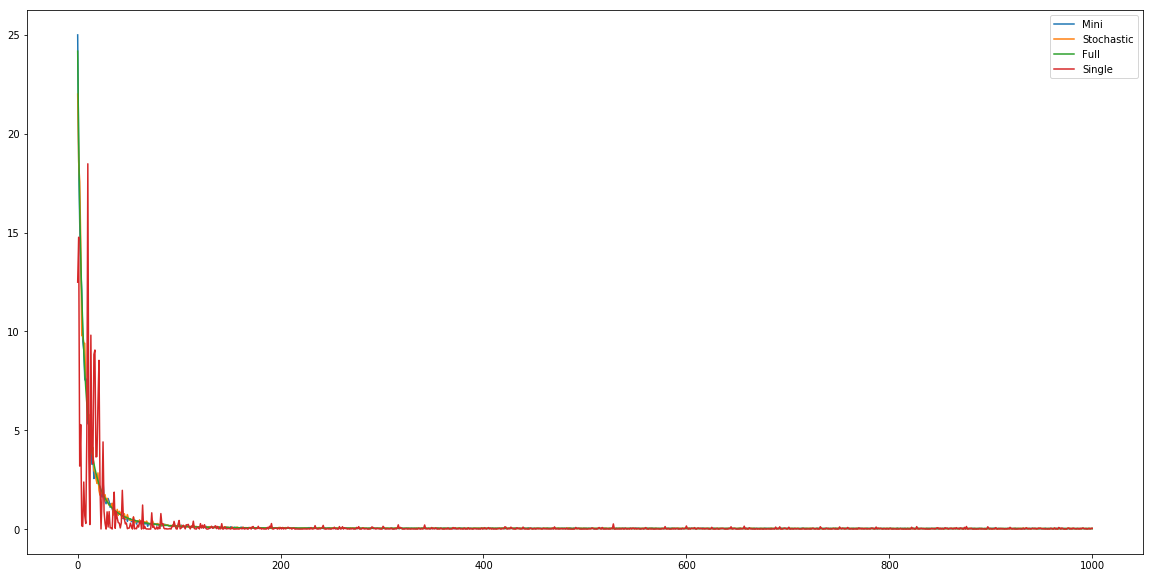

In [13]:
plt.figure(figsize=(20,10))
mini_batch.error_train.plot(label='Mini')
stoch_batch.error_train.plot(label='Stochastic')
full_batch.error_train.plot(label='Full')
single_inst.error_train.plot(label='Single')
plt.legend()

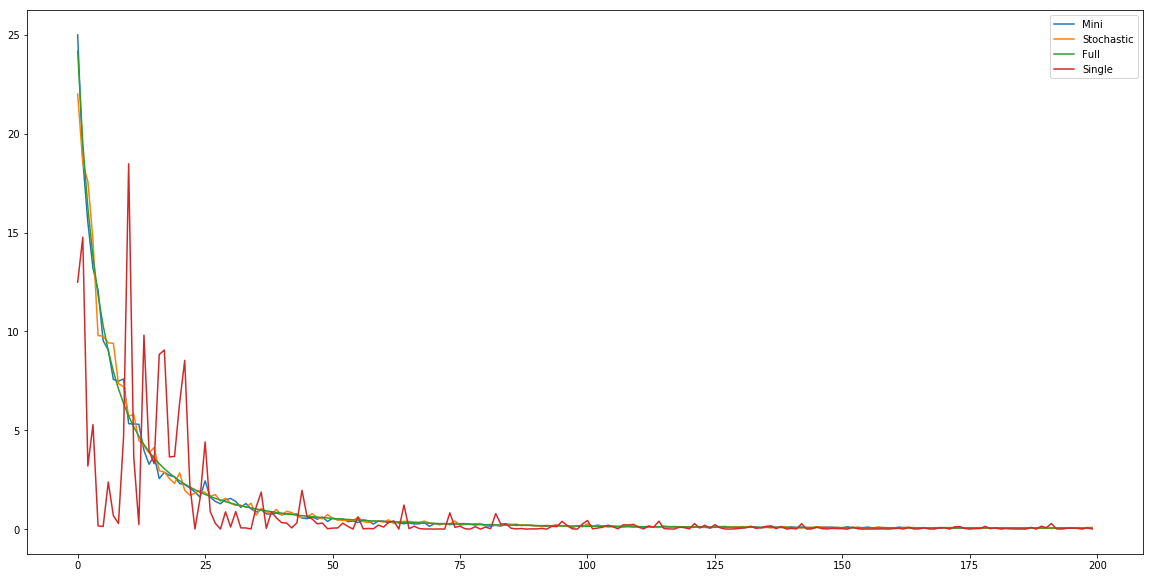

In [14]:
plt.figure(figsize=(20,10))
mini_batch.head(200).error_train.plot(label='Mini')
stoch_batch.head(200).error_train.plot(label='Stochastic')
full_batch.head(200).error_train.plot(label='Full')
single_inst.head(200).error_train.plot(label='Single')
plt.legend()

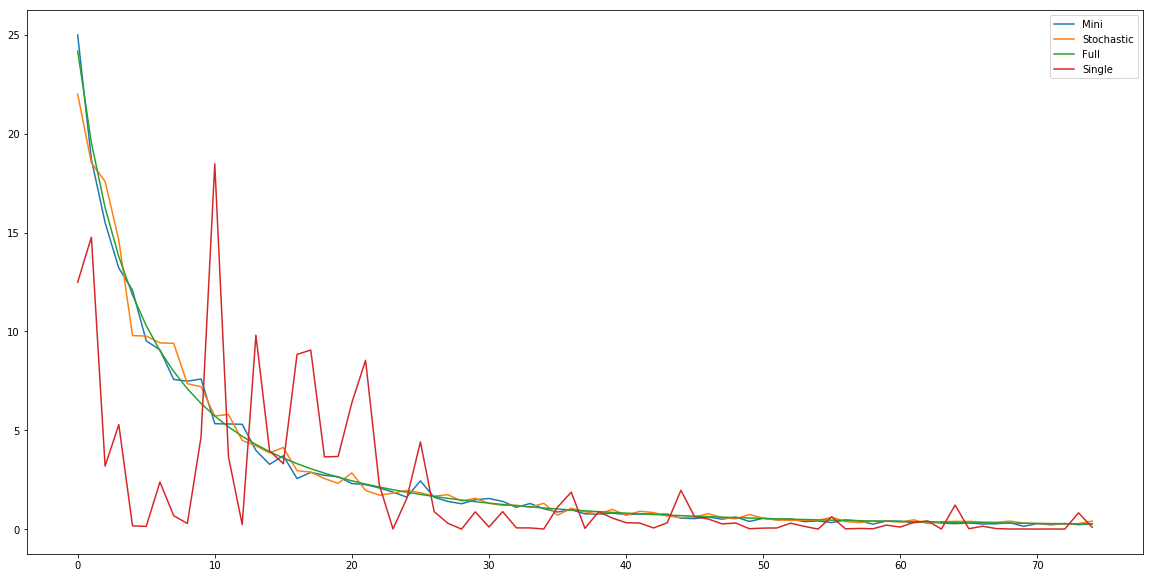

In [15]:
plt.figure(figsize=(20,10))
mini_batch.head(75).error_train.plot(label='Mini')
stoch_batch.head(75).error_train.plot(label='Stochastic')
full_batch.head(75).error_train.plot(label='Full')
single_inst.head(75).error_train.plot(label='Single')
plt.legend()

## Discution 2
  - Testing the optimizer in a way to check also if there is any overfitting behaviour when the number of iterations are 1 million.

In [16]:
max_iter = 1000000
base_params = {'lr':0.1,
'max_iter':max_iter,
'lr_optimizer':'invscaling',
'print_interval':5000}

theta = customSGD.SGD(**base_params, 
                      batch_type='Full',
                      epsilon=.000000000001,
                      X=X_train, y=np.log(y_train), 
                      X_val=X_test, y_val=np.log(y_test), 
                      )


Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Train Loss: 24.17583616 lr: 0.10000000 Val Loss: 24.11956101
It: 5000 Batch: 1 Epoch 4999 Train Loss: 0.01150811 lr: 0.01189207 Val Loss: 0.01201906
It: 10000 Batch: 1 Epoch 9999 Train Loss: 0.00872021 lr: 0.01000000 Val Loss: 0.00904796
It: 15000 Batch: 1 Epoch 14999 Train Loss: 0.00821301 lr: 0.00903602 Val Loss: 0.00843925
It: 20000 Batch: 1 Epoch 19999 Train Loss: 0.00809304 lr: 0.00840896 Val Loss: 0.00826764
It: 25000 Batch: 1 Epoch 24999 Train Loss: 0.00805669 lr: 0.00795271 Val Loss: 0.00820470
It: 30000 Batch: 1 Epoch 29999 Train Loss: 0.00804129 lr: 0.00759836 Val Loss: 0.00817520
It: 35000 Batch: 1 Epoch 34999 Train Loss: 0.00803184 lr: 0.00731110 Val Loss: 0.00815805
It: 40000 Batch: 1 Epoch 39999 Train Loss: 0.00802435 lr: 0.00707107 Val Loss: 0.00814622
It: 45000 Batch: 1 Epoch 44999 Train Loss: 0.00801768 lr: 0.00686589 Val Loss: 0.00813702
It: 50000 Batch: 1 Epoch 49999 Train Loss: 0.00801143 lr: 0

It: 450000 Batch: 1 Epoch 449999 Train Loss: 0.00778164 lr: 0.00386097 Val Loss: 0.00789231
It: 455000 Batch: 1 Epoch 454999 Train Loss: 0.00778005 lr: 0.00385032 Val Loss: 0.00789069
It: 460000 Batch: 1 Epoch 459999 Train Loss: 0.00777847 lr: 0.00383982 Val Loss: 0.00788908
It: 465000 Batch: 1 Epoch 464999 Train Loss: 0.00777692 lr: 0.00382945 Val Loss: 0.00788749
It: 470000 Batch: 1 Epoch 469999 Train Loss: 0.00777537 lr: 0.00381923 Val Loss: 0.00788591
It: 475000 Batch: 1 Epoch 474999 Train Loss: 0.00777384 lr: 0.00380914 Val Loss: 0.00788435
It: 480000 Batch: 1 Epoch 479999 Train Loss: 0.00777233 lr: 0.00379918 Val Loss: 0.00788280
It: 485000 Batch: 1 Epoch 484999 Train Loss: 0.00777082 lr: 0.00378935 Val Loss: 0.00788126
It: 490000 Batch: 1 Epoch 489999 Train Loss: 0.00776934 lr: 0.00377964 Val Loss: 0.00787974
It: 495000 Batch: 1 Epoch 494999 Train Loss: 0.00776786 lr: 0.00377006 Val Loss: 0.00787823
It: 500000 Batch: 1 Epoch 499999 Train Loss: 0.00776640 lr: 0.00376060 Val Loss:

It: 900000 Batch: 1 Epoch 899999 Train Loss: 0.00767930 lr: 0.00324668 Val Loss: 0.00778698
It: 905000 Batch: 1 Epoch 904999 Train Loss: 0.00767847 lr: 0.00324219 Val Loss: 0.00778611
It: 910000 Batch: 1 Epoch 909999 Train Loss: 0.00767765 lr: 0.00323772 Val Loss: 0.00778526
It: 915000 Batch: 1 Epoch 914999 Train Loss: 0.00767683 lr: 0.00323329 Val Loss: 0.00778440
It: 920000 Batch: 1 Epoch 919999 Train Loss: 0.00767601 lr: 0.00322889 Val Loss: 0.00778355
It: 925000 Batch: 1 Epoch 924999 Train Loss: 0.00767520 lr: 0.00322452 Val Loss: 0.00778271
It: 930000 Batch: 1 Epoch 929999 Train Loss: 0.00767440 lr: 0.00322017 Val Loss: 0.00778187
It: 935000 Batch: 1 Epoch 934999 Train Loss: 0.00767360 lr: 0.00321586 Val Loss: 0.00778103
It: 940000 Batch: 1 Epoch 939999 Train Loss: 0.00767280 lr: 0.00321157 Val Loss: 0.00778020
It: 945000 Batch: 1 Epoch 944999 Train Loss: 0.00767201 lr: 0.00320732 Val Loss: 0.00777938
It: 950000 Batch: 1 Epoch 949999 Train Loss: 0.00767122 lr: 0.00320309 Val Loss:

In [17]:
inv_scaling = customSGD.get_iteration_log()
inv_scaling.head()

6


,it,b_it,epoch,error_train,eta,error_val
0,1,1,0,24.175836,0.100000,24.119561
1,2,1,1,19.549439,0.084090,19.533135
2,3,1,2,16.259407,0.075984,16.266074
3,4,1,3,13.779518,0.070711,13.799800
4,5,1,4,11.842491,0.066874,11.870753


In [18]:
base_params = {'lr':0.1,
'max_iter':max_iter,
'lr_optimizer':None,
'print_interval':5000}

theta = customSGD.SGD(**base_params, 
                      batch_type='Full',
                      epsilon=.000000000001,
                      X=X_train, y=np.log(y_train), 
                      X_val=X_test, y_val=np.log(y_test), 
                      )


Number of samples: 16864
Number of parameters: 13
It: 1 Batch: 1 Epoch 0 Train Loss: 24.17583616 lr: 0.10000000 Val Loss: 24.11956101
It: 5000 Batch: 1 Epoch 4999 Train Loss: 0.00800174 lr: 0.10000000 Val Loss: 0.00811816
It: 10000 Batch: 1 Epoch 9999 Train Loss: 0.00792337 lr: 0.10000000 Val Loss: 0.00803693
It: 15000 Batch: 1 Epoch 14999 Train Loss: 0.00786057 lr: 0.10000000 Val Loss: 0.00797281
It: 20000 Batch: 1 Epoch 19999 Train Loss: 0.00780937 lr: 0.10000000 Val Loss: 0.00792062
It: 25000 Batch: 1 Epoch 24999 Train Loss: 0.00776694 lr: 0.10000000 Val Loss: 0.00787729
It: 30000 Batch: 1 Epoch 29999 Train Loss: 0.00773121 lr: 0.10000000 Val Loss: 0.00784066
It: 35000 Batch: 1 Epoch 34999 Train Loss: 0.00770064 lr: 0.10000000 Val Loss: 0.00780912
It: 40000 Batch: 1 Epoch 39999 Train Loss: 0.00767404 lr: 0.10000000 Val Loss: 0.00778150
It: 45000 Batch: 1 Epoch 44999 Train Loss: 0.00765055 lr: 0.10000000 Val Loss: 0.00775691
It: 50000 Batch: 1 Epoch 49999 Train Loss: 0.00762948 lr: 0

It: 450000 Batch: 1 Epoch 449999 Train Loss: 0.00698728 lr: 0.10000000 Val Loss: 0.00701253
It: 455000 Batch: 1 Epoch 454999 Train Loss: 0.00698306 lr: 0.10000000 Val Loss: 0.00700760
It: 460000 Batch: 1 Epoch 459999 Train Loss: 0.00697890 lr: 0.10000000 Val Loss: 0.00700273
It: 465000 Batch: 1 Epoch 464999 Train Loss: 0.00697479 lr: 0.10000000 Val Loss: 0.00699792
It: 470000 Batch: 1 Epoch 469999 Train Loss: 0.00697074 lr: 0.10000000 Val Loss: 0.00699316
It: 475000 Batch: 1 Epoch 474999 Train Loss: 0.00696674 lr: 0.10000000 Val Loss: 0.00698846
It: 480000 Batch: 1 Epoch 479999 Train Loss: 0.00696279 lr: 0.10000000 Val Loss: 0.00698381
It: 485000 Batch: 1 Epoch 484999 Train Loss: 0.00695888 lr: 0.10000000 Val Loss: 0.00697922
It: 490000 Batch: 1 Epoch 489999 Train Loss: 0.00695503 lr: 0.10000000 Val Loss: 0.00697468
It: 495000 Batch: 1 Epoch 494999 Train Loss: 0.00695123 lr: 0.10000000 Val Loss: 0.00697019
It: 500000 Batch: 1 Epoch 499999 Train Loss: 0.00694748 lr: 0.10000000 Val Loss:

It: 900000 Batch: 1 Epoch 899999 Train Loss: 0.00676143 lr: 0.10000000 Val Loss: 0.00673572
It: 905000 Batch: 1 Epoch 904999 Train Loss: 0.00676011 lr: 0.10000000 Val Loss: 0.00673396
It: 910000 Batch: 1 Epoch 909999 Train Loss: 0.00675880 lr: 0.10000000 Val Loss: 0.00673222
It: 915000 Batch: 1 Epoch 914999 Train Loss: 0.00675752 lr: 0.10000000 Val Loss: 0.00673051
It: 920000 Batch: 1 Epoch 919999 Train Loss: 0.00675625 lr: 0.10000000 Val Loss: 0.00672881
It: 925000 Batch: 1 Epoch 924999 Train Loss: 0.00675499 lr: 0.10000000 Val Loss: 0.00672713
It: 930000 Batch: 1 Epoch 929999 Train Loss: 0.00675375 lr: 0.10000000 Val Loss: 0.00672547
It: 935000 Batch: 1 Epoch 934999 Train Loss: 0.00675253 lr: 0.10000000 Val Loss: 0.00672382
It: 940000 Batch: 1 Epoch 939999 Train Loss: 0.00675133 lr: 0.10000000 Val Loss: 0.00672220
It: 945000 Batch: 1 Epoch 944999 Train Loss: 0.00675014 lr: 0.10000000 Val Loss: 0.00672059
It: 950000 Batch: 1 Epoch 949999 Train Loss: 0.00674896 lr: 0.10000000 Val Loss:

In [19]:
constant = customSGD.get_iteration_log()
constant.head()

6


,it,b_it,epoch,error_train,eta,error_val
0,1,1,0,24.175836,0.1,24.119561
1,2,1,1,18.738728,0.1,18.729069
2,3,1,2,14.688400,0.1,14.705088
3,4,1,3,11.639859,0.1,11.670076
4,5,1,4,9.321762,0.1,9.357572


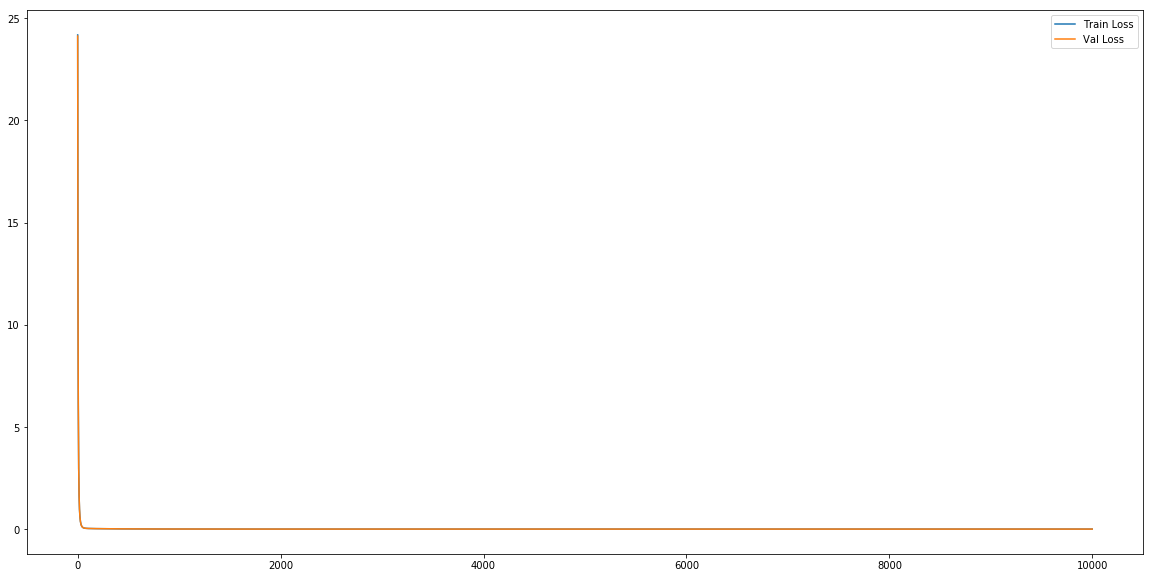

In [20]:
plt.figure(figsize=(20,10))
constant.head(10000).error_train.plot(label='Train Loss')
constant.head(10000).error_val.plot(label='Val Loss')
plt.legend()

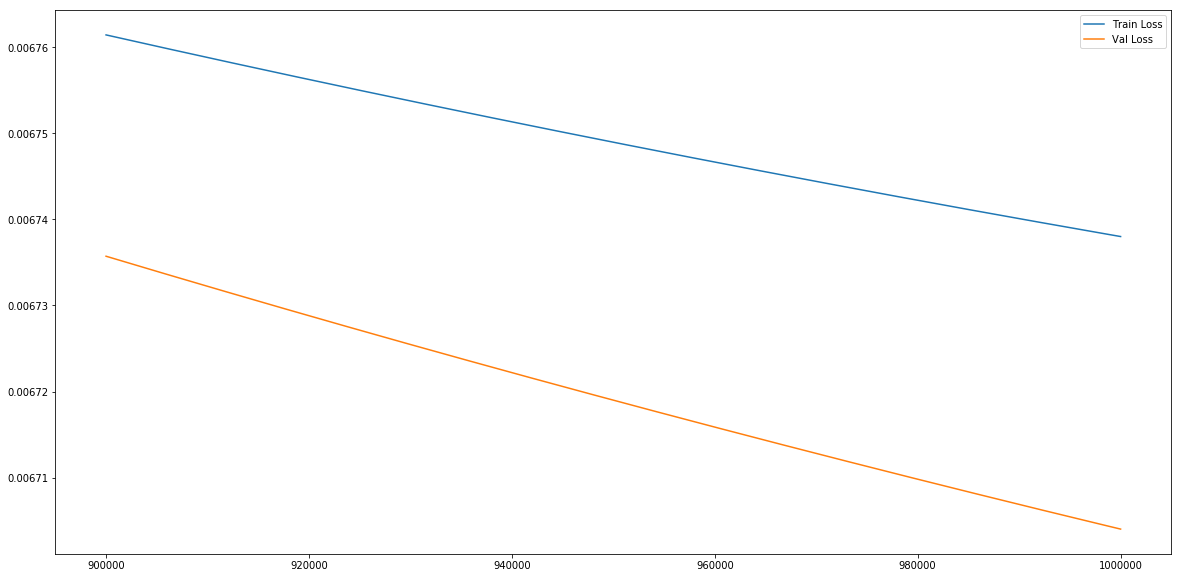

In [21]:
plt.figure(figsize=(20,10))
constant.tail(100000).error_train.plot(label='Train Loss')
constant.tail(100000).error_val.plot(label='Val Loss')
plt.legend()

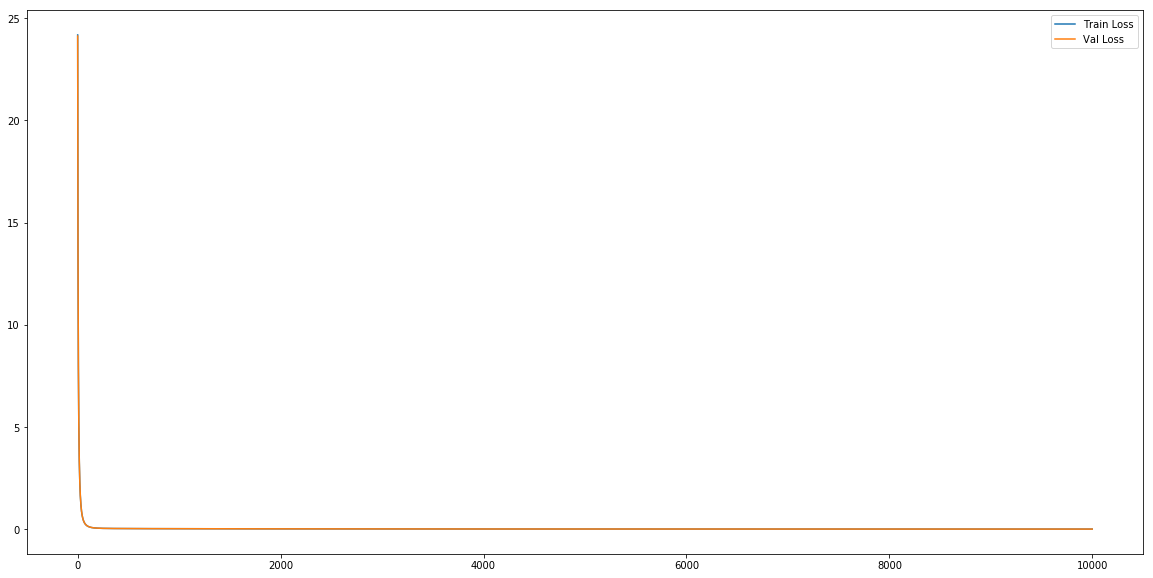

In [22]:
plt.figure(figsize=(20,10))
inv_scaling.head(10000).error_train.plot(label='Train Loss')
inv_scaling.head(10000).error_val.plot(label='Val Loss')
plt.legend()

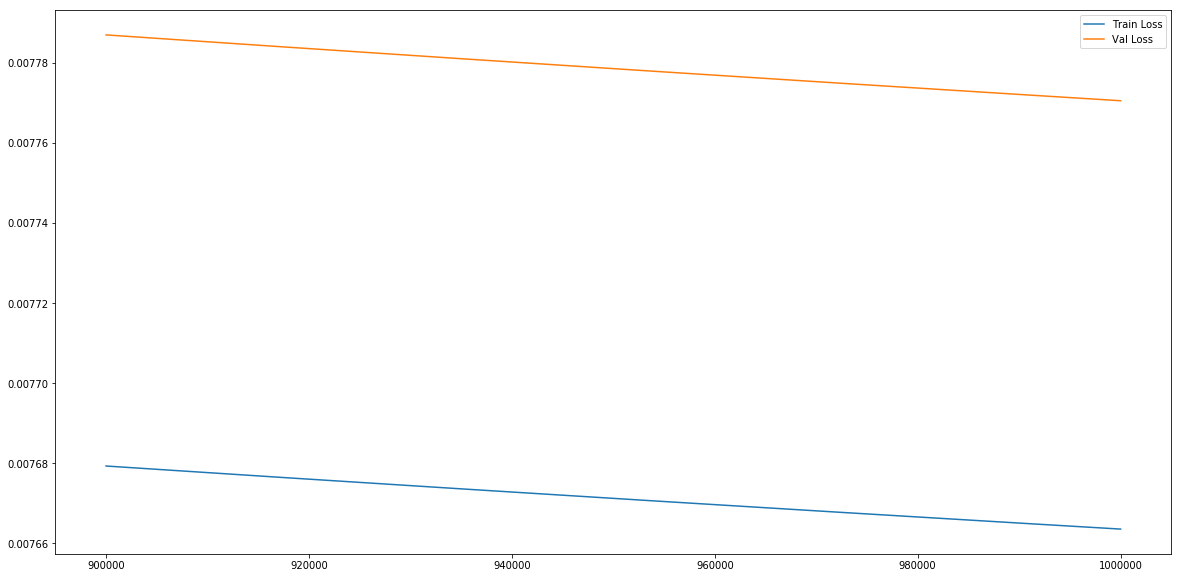

In [23]:
plt.figure(figsize=(20,10))
inv_scaling.tail(100000).error_train.plot(label='Train Loss')
inv_scaling.tail(100000).error_val.plot(label='Val Loss')
plt.legend()